In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import datetime
import math
import itertools
from sklearn import preprocessing
import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt

C:\Users\joker\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  after removing the cwd from sys.path.


In [2]:
df1 = pd.read_csv('./SelfData_thesis/0630_self16GData_3to7_ONU16.csv', usecols=[1], engine='python')
df1.head()

,Gi
0,23691
1,30751
2,27359
3,73503
4,11049


In [3]:
df2 = pd.read_csv('./SelfData_thesis/0630_self16GData_3to7_ONU16.csv', usecols=[2], engine='python')
df2.head()

,Ai
0,22730
1,27682
2,26849
3,68787
4,16049


In [4]:
#df3 = pd.read_csv('./SelfData_thesis/0628_self8GData_3to7_ONU16_limitData.csv', usecols=[2], engine='python')
#df3.head()

In [5]:
df1 = df1.values
df1 = df1.astype('float32')

df2 = df2.values
df2 = df2.astype('float32')

#df3 = df3.values
#df3 = df3.astype('float32')

In [6]:
print(np.max(df1))
print(np.max(df2))
#print(np.max(df3))

df1Max = np.max(df1)
df2Max = np.max(df2)
#df3Max = np.max(df3)

df1 = df1 / np.max(df1) #手動正規化
df2 = df2 / np.max(df2) #手動正規化
#df3 = df3 / np.max(df3) #手動正規化

195000.0
951963.0


In [7]:
print(len(df1))
print(len(df2))
#print(len(df3))

7113
7113


In [8]:
datasetR = df1
datasetA = df2
#datasetT = df3

In [9]:
# split into train and test sets
train_sizeR = int(len(datasetR) * 0.8) 
test_sizeR = len(datasetR) - train_sizeR
trainR, testR = datasetR[0:train_sizeR], datasetR[train_sizeR:len(datasetR)]

#scaler = MinMaxScaler(feature_range=(0, 1))
#trainR = scaler.fit_transform(trainR)
#testR = scaler.fit_transform(testR)
print(len(trainR), len(testR))

5690 1423


In [10]:
# split into train and test sets
train_sizeA = int(len(datasetA) * 0.8) 
test_sizeA = len(datasetA) - train_sizeA
trainA, testA = datasetA[0:train_sizeA], datasetA[train_sizeA:len(datasetA)]

#scaler = MinMaxScaler(feature_range=(0, 1))
#trainR = scaler.fit_transform(trainR)
#testR = scaler.fit_transform(testR)
print(len(trainA), len(testA))

5690 1423


In [11]:
# split into train and test sets
#train_sizeT = int(len(datasetT) * 0.8) 
#test_sizeT = len(datasetT) - train_sizeT
#trainT, testT = datasetT[0:train_sizeT], datasetT[train_sizeT:len(datasetT)]

#scaler = MinMaxScaler(feature_range=(0, 1))
#trainR = scaler.fit_transform(trainR)
#testR = scaler.fit_transform(testR)
#print(len(trainT), len(testT))

In [12]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)

In [13]:
# reshape into X=t and Y=t+1
look_back = 64 #16
trainX_R, trainY_R = create_dataset(trainR, look_back)
testX_R, testY_R = create_dataset(testR, look_back)

trainX_A, trainY_A = create_dataset(trainA, look_back)
testX_A, testY_A = create_dataset(testA, look_back)

#trainX_T, trainY_T = create_dataset(trainT, look_back)
#testX_T, testY_T = create_dataset(testT, look_back)

In [14]:
# reshape input to be [samples, time steps, features]
trainX_R = np.reshape(trainX_R, (trainX_R.shape[0], look_back, 1))
testX_R = np.reshape(testX_R, (testX_R.shape[0], look_back, 1))

trainX_A = np.reshape(trainX_A, (trainX_A.shape[0], look_back, 1))
testX_A = np.reshape(testX_A, (testX_A.shape[0], look_back, 1))

#trainX_T = np.reshape(trainX_T, (trainX_T.shape[0], look_back, 1))
#testX_T = np.reshape(testX_T, (testX_T.shape[0], look_back, 1))
#print(trainX.shape[1])

print(trainX_R.shape)
print(trainY_R.shape)
print(testX_R.shape)
print(testY_R.shape)

print(trainX_A.shape)
print(trainY_A.shape)
print(testX_A.shape)
print(testY_A.shape)

#print(trainX_T.shape)
#print(trainY_T.shape)
#print(testX_T.shape)
#print(testY_T.shape)

(5625, 64, 1)
(5625, 1)
(1358, 64, 1)
(1358, 1)
(5625, 64, 1)
(5625, 1)
(1358, 64, 1)
(1358, 1)


In [15]:
from __future__ import print_function
import math
#importing keras modules
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Activation ,Dropout , Flatten , Conv1D , MaxPooling1D
from tensorflow.keras.layers import Input, Reshape, concatenate, LSTM
from tensorflow.keras import losses
from tensorflow.keras import optimizers

In [16]:
inputs_R = Input(shape=(look_back,))
inputs_A = Input(shape=(look_back,))
#inputs_T = Input(shape=(look_back,))

inputs_R_test = Reshape((inputs_R.shape[1], 1))(inputs_R)
inputs_A_test = Reshape((inputs_A.shape[1], 1))(inputs_A)
#inputs_T_test = Reshape((inputs_R.shape[1], 1))(inputs_T)

In [17]:
head_list = []

Ri_1 = Conv1D(filters=32,kernel_size=1,padding='same',activation='relu',kernel_initializer="glorot_uniform")(inputs_R_test)
Ri_2 = MaxPooling1D(pool_size=2,padding='valid')(Ri_1)
Ri_3 = Conv1D(filters=32,kernel_size=1,padding='same',activation='relu',kernel_initializer="glorot_uniform")(Ri_2)
Ri_4 = MaxPooling1D(pool_size=2,padding='valid')(Ri_3)

Ai_1 = Conv1D(filters=32,kernel_size=1,padding='same',activation='relu',kernel_initializer="glorot_uniform")(inputs_A_test)
Ai_2 = MaxPooling1D(pool_size=2,padding='valid')(Ai_1)
Ai_3 = Conv1D(filters=32,kernel_size=1,padding='same',activation='relu',kernel_initializer="glorot_uniform")(Ai_2)
Ai_4 = MaxPooling1D(pool_size=2,padding='valid')(Ai_3)

#Ti_1 = Conv1D(filters=32,kernel_size=1,padding='same',activation='relu',kernel_initializer="glorot_uniform")(inputs_T_test)
#Ti_2 = MaxPooling1D(pool_size=2,padding='valid')(Ti_1)
#Ti_3 = Conv1D(filters=32,kernel_size=1,padding='same',activation='relu',kernel_initializer="glorot_uniform")(Ti_2)
#Ti_4 = MaxPooling1D(pool_size=2,padding='valid')(Ti_3)

Ri_5 = Flatten()(Ri_4)
head_list.append(Ri_5)
Ai_5 = Flatten()(Ai_4)
head_list.append(Ai_5)
#Ti_5 = Flatten()(Ti_4)

out = concatenate(head_list, axis = 1)
reshape = Reshape((head_list[0].shape[1], 2))(out)
#out = concatenate([Ri_5, Ai_5, Ti_5], axis = -1)
tgt6 = LSTM(32,return_sequences=True)(reshape)
tgt7 = LSTM(32,return_sequences=False)(tgt6)

predictions = Dense(1, activation="relu", kernel_initializer="uniform")(tgt7)

model = Model([inputs_R, inputs_A], outputs = predictions)
model.compile(loss='mae',optimizer='Adam',metrics=['mse','mae'])

In [18]:
print(model.summary())

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64)]         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 64)]         0                                            
__________________________________________________________________________________________________
reshape (Reshape)               (None, 64, 1)        0           input_1[0][0]                    
__________________________________________________________________________________________________
reshape_1 (Reshape)             (None, 64, 1)        0           input_2[0][0]                    
_______________________________________________________________________________________

In [19]:
from timeit import default_timer as timer
start = timer()
history = model.fit([trainX_R, trainX_A],
                    trainY_A,
                    batch_size=64,
                    epochs=30,
                    validation_split=0.2,
                    verbose=2)
end = timer()
print(end - start)

Epoch 1/30
71/71 - 3s - loss: 0.0257 - mse: 0.0020 - mae: 0.0257 - val_loss: 0.0262 - val_mse: 0.0021 - val_mae: 0.0262
Epoch 2/30
71/71 - 2s - loss: 0.0239 - mse: 0.0018 - mae: 0.0239 - val_loss: 0.0256 - val_mse: 0.0022 - val_mae: 0.0256
Epoch 3/30
71/71 - 2s - loss: 0.0229 - mse: 0.0018 - mae: 0.0229 - val_loss: 0.0241 - val_mse: 0.0021 - val_mae: 0.0241
Epoch 4/30
71/71 - 2s - loss: 0.0219 - mse: 0.0018 - mae: 0.0219 - val_loss: 0.0236 - val_mse: 0.0021 - val_mae: 0.0236
Epoch 5/30
71/71 - 2s - loss: 0.0216 - mse: 0.0017 - mae: 0.0216 - val_loss: 0.0234 - val_mse: 0.0020 - val_mae: 0.0234
Epoch 6/30
71/71 - 2s - loss: 0.0215 - mse: 0.0017 - mae: 0.0215 - val_loss: 0.0235 - val_mse: 0.0021 - val_mae: 0.0235
Epoch 7/30
71/71 - 2s - loss: 0.0214 - mse: 0.0017 - mae: 0.0214 - val_loss: 0.0234 - val_mse: 0.0021 - val_mae: 0.0234
Epoch 8/30
71/71 - 2s - loss: 0.0213 - mse: 0.0017 - mae: 0.0213 - val_loss: 0.0233 - val_mse: 0.0020 - val_mae: 0.0233
Epoch 9/30
71/71 - 2s - loss: 0.0214 - m

In [20]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])

timesteps :  64


Text(0.5, 1.0, 'mae')

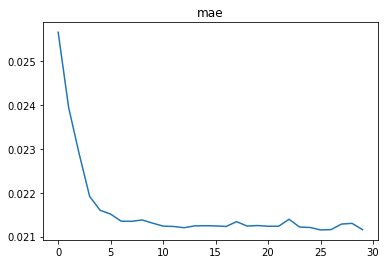

In [21]:
print('timesteps : ', look_back)
plt.plot(history.history['mae'])
plt.title('mae')

timesteps :  64


Text(0.5, 1.0, 'mse')

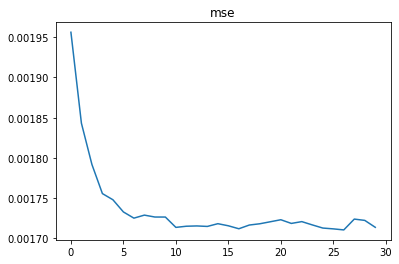

In [22]:
print('timesteps : ', look_back)
plt.plot(history.history['mse'])
plt.title('mse')

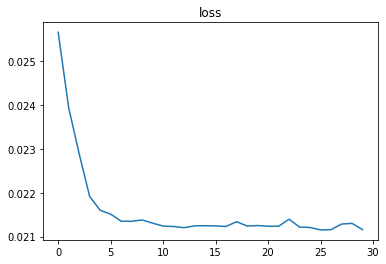

In [23]:
plt.title('loss')
plt.plot(history.history['loss'])

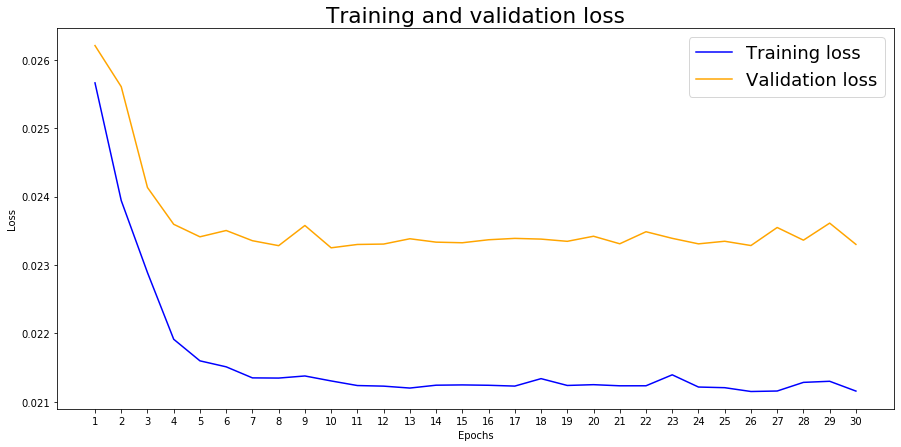

In [24]:
# 画出训练集和验证集的损失曲线

import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
loss_values50 = loss_values[0:150]
val_loss_values50 = val_loss_values[0:150]
epochs = range(1, len(loss_values50) + 1)
plt.plot(epochs, loss_values50, 'b',color = 'blue', label='Training loss')
plt.plot(epochs, val_loss_values50, 'b',color='orange', label='Validation loss')
plt.rc('font', size = 18)
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.xticks(epochs)
fig = plt.gcf()
fig.set_size_inches(15,7)
#fig.savefig('img/tcstest&validationlosscnn.png', dpi=300)
plt.show()

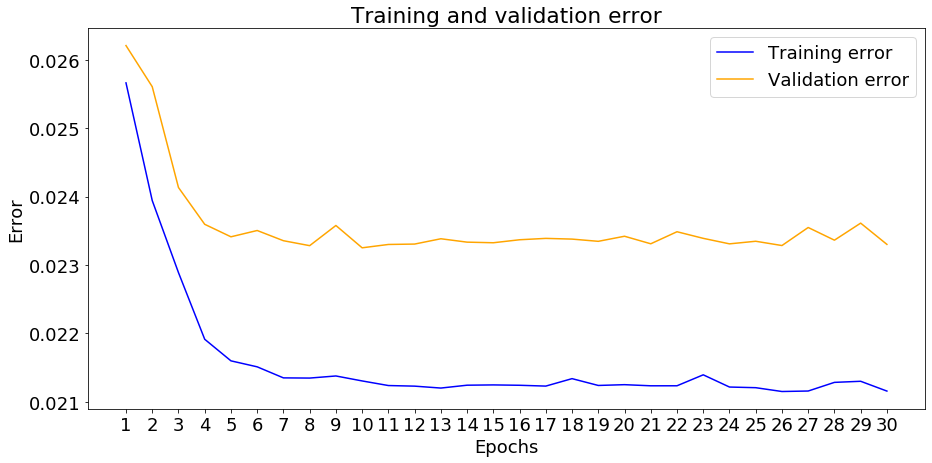

In [25]:
# 画出训练集和验证集的误差图像

#mae = history_dict['mean_absolute_error']
#vmae = history_dict['val_mean_absolute_error']
mae = history.history['mae']
vmae = history.history['val_mae']
epochs = range(1, len(mae) + 1)
plt.plot(epochs, mae, 'b',color = 'blue', label='Training error')
plt.plot(epochs, vmae, 'b',color='orange', label='Validation error')
plt.title('Training and validation error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.xticks(epochs)
fig = plt.gcf()
fig.set_size_inches(15,7)
#fig.savefig('img/tcstest&validationerrorcnn.png', dpi=300)
plt.show()

In [26]:
model.metrics_names

trainScore = model.evaluate([trainX_R, trainX_A], trainY_A, verbose=0)
testScore = model.evaluate([testX_R, testX_A], testY_A, verbose=0)

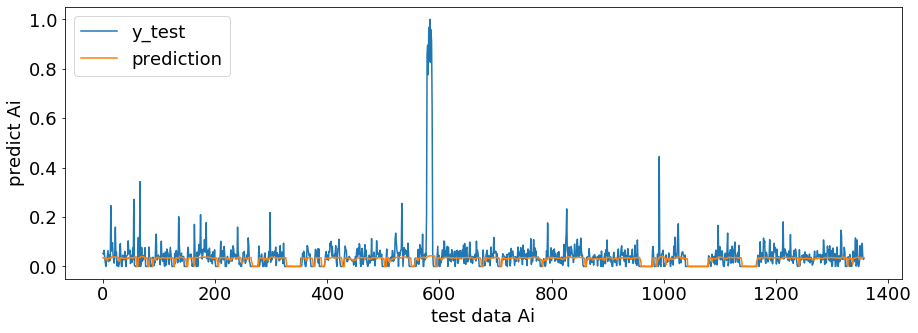

In [27]:
#predicting values for y_test
p = model.predict([testX_R, testX_A])

plt.plot(testY_A, label='y_test')
plt.plot(p, label='prediction')
plt.xlabel('test data Ai')
plt.ylabel('predict Ai')
plt.legend(loc='upper left')
fig = plt.gcf()
fig.set_size_inches(15, 5)
#fig.savefig('img/tcstestcnn.png', dpi=300)
plt.show()

In [28]:
'''
p1 = model.predict([trainX_R, trainX_A])

plt.plot(trainY_A, label='y_train')
x = np.array(range(8524,10655)) #range(x_train shape第一個數字的0.8倍, x_train shape第一個數字)
plt.plot(x,p1[8524:],color = 'magenta',label ='prediction on validating samples') #p1[數字:] 數字代表x_train shape第一個數字的0.8倍
plt.plot(p1[:8524],color='red', label='prediction on training samples')
#x = np.array(range(29512,36890)) #range(x_train shape第一個數字的0.8倍, x_train shape第一個數字)
#plt.plot(x,p1[29512:],color = 'magenta',label ='prediction on validating samples')
#plt.plot(y_train,color='blue', label='y_train')
plt.xlabel('No. of Trading Days')
plt.ylabel('Close Value (scaled)')
plt.legend(loc='upper left')
fig = plt.gcf()
fig.set_size_inches(20,10)
#fig.savefig('img/tcstraincnn.png', dpi=300)
plt.show()
'''

"\np1 = model.predict([trainX_R, trainX_A])\n\nplt.plot(trainY_A, label='y_train')\nx = np.array(range(8524,10655)) #range(x_train shape第一個數字的0.8倍, x_train shape第一個數字)\nplt.plot(x,p1[8524:],color = 'magenta',label ='prediction on validating samples') #p1[數字:] 數字代表x_train shape第一個數字的0.8倍\nplt.plot(p1[:8524],color='red', label='prediction on training samples')\n#x = np.array(range(29512,36890)) #range(x_train shape第一個數字的0.8倍, x_train shape第一個數字)\n#plt.plot(x,p1[29512:],color = 'magenta',label ='prediction on validating samples')\n#plt.plot(y_train,color='blue', label='y_train')\nplt.xlabel('No. of Trading Days')\nplt.ylabel('Close Value (scaled)')\nplt.legend(loc='upper left')\nfig = plt.gcf()\nfig.set_size_inches(20,10)\n#fig.savefig('img/tcstraincnn.png', dpi=300)\nplt.show()\n"

In [29]:
'''
#手動正規化
y = testY_A * df2Max   
y_pred = p.reshape(2615)  
y_pred = y_pred * df2Max   

Ytrain = trainY_A * df2Max
Ytest = testY_A * df2Max

PP = p * df2Max
P1 = p1 * df2Max
'''

'\n#手動正規化\ny = testY_A * df2Max   \ny_pred = p.reshape(2615)  \ny_pred = y_pred * df2Max   \n\nYtrain = trainY_A * df2Max\nYtest = testY_A * df2Max\n\nPP = p * df2Max\nP1 = p1 * df2Max\n'

In [30]:
'''
from sklearn.metrics import mean_absolute_error

print('Trainscore RMSE \tTrain Mean abs Error \tTestscore Rmse \t Test Mean abs Error')
print('%.9f \t\t %.9f \t\t %.9f \t\t %.9f' % (math.sqrt(trainScore[0]),trainScore[1],math.sqrt(testScore[0]),testScore[1]))

print('mean absolute error \t mean absolute percentage error')
print(' %.9f \t\t\t %.9f' % (mean_absolute_error(y,y_pred),(np.mean(np.abs((y - y_pred) / y)) * 100)))
'''

"\nfrom sklearn.metrics import mean_absolute_error\n\nprint('Trainscore RMSE \tTrain Mean abs Error \tTestscore Rmse \t Test Mean abs Error')\nprint('%.9f \t\t %.9f \t\t %.9f \t\t %.9f' % (math.sqrt(trainScore[0]),trainScore[1],math.sqrt(testScore[0]),testScore[1]))\n\nprint('mean absolute error \t mean absolute percentage error')\nprint(' %.9f \t\t\t %.9f' % (mean_absolute_error(y,y_pred),(np.mean(np.abs((y - y_pred) / y)) * 100)))\n"

In [31]:
'''
print('mean squared error = ')
print(tf.keras.losses.mean_squared_error(y, y_pred))
'''

"\nprint('mean squared error = ')\nprint(tf.keras.losses.mean_squared_error(y, y_pred))\n"

In [32]:
'''
Y = np.concatenate((Ytrain,Ytest),axis = 0)
plt.plot(Y, label='Y')
P = np.concatenate((P1,PP),axis = 0)
#plotting the complete Y set with predicted values on x_train and x_test(variable p1 & p respectively given above)
#for 
plt.plot(P[:8524],color='red', label='prediction on training samples') #p[:數字] 數字代表x_train shape第一個數字的0.8倍
#for validating samples
z = np.array(range(8524,10655)) #range(x_train shape第一個數字的0.8倍, x_train shape第一個數字)
plt.plot(z,P[8524:10655],color = 'orange',label ='prediction on validating samples') #P[x_train shape第一個數字的0.8倍:x_train shape第一個數字]
#for testing samples
x = np.array(range(10655,13270)) #range(x_train shape第一個數字, x_train shape第一個數字 + x_test shape第一個數字)
plt.plot(x,P[10655:],color = 'purple',label ='prediction on testing samples(x_test)') #p[數字:] 數字代表x_train shape第一個數字

#plt.plot(Y,color='blue', label='Y')
plt.legend(loc='upper left')
fig = plt.gcf()
fig.set_size_inches(20,12)
plt.show()
'''

"\nY = np.concatenate((Ytrain,Ytest),axis = 0)\nplt.plot(Y, label='Y')\nP = np.concatenate((P1,PP),axis = 0)\n#plotting the complete Y set with predicted values on x_train and x_test(variable p1 & p respectively given above)\n#for \nplt.plot(P[:8524],color='red', label='prediction on training samples') #p[:數字] 數字代表x_train shape第一個數字的0.8倍\n#for validating samples\nz = np.array(range(8524,10655)) #range(x_train shape第一個數字的0.8倍, x_train shape第一個數字)\nplt.plot(z,P[8524:10655],color = 'orange',label ='prediction on validating samples') #P[x_train shape第一個數字的0.8倍:x_train shape第一個數字]\n#for testing samples\nx = np.array(range(10655,13270)) #range(x_train shape第一個數字, x_train shape第一個數字 + x_test shape第一個數字)\nplt.plot(x,P[10655:],color = 'purple',label ='prediction on testing samples(x_test)') #p[數字:] 數字代表x_train shape第一個數字\n\n#plt.plot(Y,color='blue', label='Y')\nplt.legend(loc='upper left')\nfig = plt.gcf()\nfig.set_size_inches(20,12)\nplt.show()\n"

In [33]:
'''
plt.plot(Ytest[:300], label='y_test')
plt.plot(PP[:300], label='prediction')
plt.title('ONU16 request')
plt.xlabel('Test Case')
plt.ylabel('Ai')
plt.legend(loc='upper left')
fig = plt.gcf()
fig.set_size_inches(15, 10)
#fig.savefig('img/tcstestcnn.png', dpi=300)
plt.legend()
plt.show()
'''

"\nplt.plot(Ytest[:300], label='y_test')\nplt.plot(PP[:300], label='prediction')\nplt.title('ONU16 request')\nplt.xlabel('Test Case')\nplt.ylabel('Ai')\nplt.legend(loc='upper left')\nfig = plt.gcf()\nfig.set_size_inches(15, 10)\n#fig.savefig('img/tcstestcnn.png', dpi=300)\nplt.legend()\nplt.show()\n"

In [34]:
#tf.keras.utils.plot_model(model, to_file='CNNLSTMmodel_GiAipredictAi.png')

In [36]:
#model.save('./SelfData_thesis/0715_U16D00_CNNLSTM_ONU16_Gi195000_Ai951963_Ai_4layer_timesteps64_epoch30.h5', include_optimizer=False)